In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
%pip install nltk
from nltk.tokenize import word_tokenize

In [9]:
file_path = "gold-dataset-sinha-khandait.csv"  # Update with the correct file path
df = pd.read_csv(file_path)
# Select only the relevant columns
df = df[["News", "Price Sentiment"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   News             10570 non-null  object
 1   Price Sentiment  10570 non-null  object
dtypes: object(2)
memory usage: 165.3+ KB
None
News               0
Price Sentiment    0
dtype: int64
Price Sentiment
positive    4412
negative    3814
none        1968
neutral      376
Name: count, dtype: int64


<Axes: xlabel='Price Sentiment'>

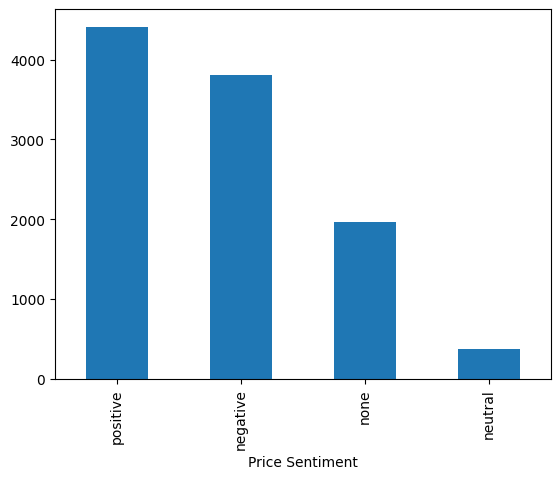

In [13]:
print(df.info())
print(df.isnull().sum())
df = df.drop_duplicates(subset=['News', 'Price Sentiment'])
print(df['Price Sentiment'].value_counts())
df['Price Sentiment'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Text Length Distribution'}, ylabel='Frequency'>

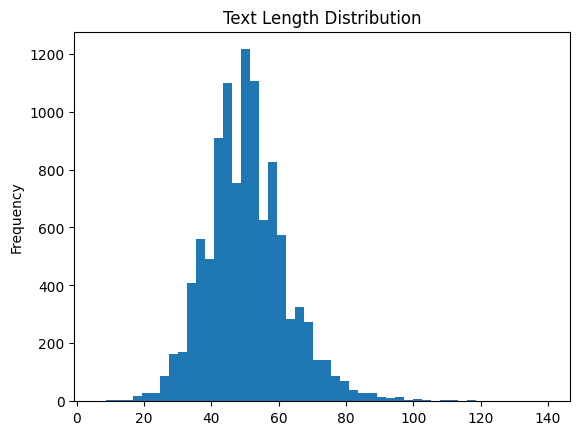

In [14]:
df['text_length'] = df['News'].apply(len)
df['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 523.0 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


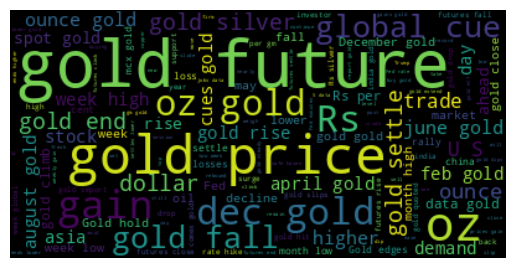

In [ ]:
text = " ".join(df['News'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
for sentiment in df['Price Sentiment'].unique():
    words = " ".join(df[df['Price Sentiment'] == sentiment]['News'])
    common_words = Counter(word_tokenize(words)).most_common(10)
    print(f"Common words for {sentiment}: {common_words}")

  Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.
Common words for negative: [('gold', 2667), (',', 1850), ('$', 1756), ('Gold', 1103), ('at', 938), ('to', 869), ('down', 862), ('%', 804), ('on', 773), ('futures', 750)]
Common words for positive: [('gold', 3119), (',', 2052), ('$', 2010), ('Gold', 1232), ('up', 1143), ('at', 1124), ('on', 997), ('to', 883), ('%', 879), ('futures', 860)]
Common words for none: [('gold', 1815), (':', 663), ('to', 505), (',', 496), ('in', 425), ('on', 255), ('for', 235), ("'s", 208), ('of', 203), ('the', 200)]
Common words for neutral: [('gold', 255), ('Gold', 122), ('steady', 112), ('in', 98), (',', 92), (':', 79), ('prices', 75), ('trade', 74), ('to', 73), ('on', 64)]


In [21]:
df['News'] = df['News'].str.lower()
N = 10
neutral_samples = df[df["Price Sentiment"] == "neutral"].sample(n=N, random_state=0)
positive_samples = df[df["Price Sentiment"] == "positive"].sample(n=N, random_state=0)
negative_samples = df[df["Price Sentiment"] == "negative"].sample(n=N, random_state=0)


balanced_df = pd.concat([neutral_samples, positive_samples, negative_samples])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

system_message = "You are a Gold Sentiment Analysis assistant that provides accurate sentiment predictions."

output_file = "gold_sentiment_analysis.jsonl"
with open(output_file, "w") as f:
    for _, row in balanced_df.iterrows():
        conversation = {
            "messages": [
                {"role": "system", "content": system_message},
                {"role": "user", "content": row["News"]},
                {"role": "assistant", "content": row["Price Sentiment"]}
            ]
        }
        f.write(json.dumps(conversation) + "\n")